In [1]:
#importing dependencies
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
#data collection and processing 
heart_data=pd.read_csv("framingham.csv")
print(heart_data)

      male  age  education  currentSmoker  cigsPerDay  BPMeds  \
0        1   39        4.0              0         0.0     0.0   
1        0   46        2.0              0         0.0     0.0   
2        1   48        1.0              1        20.0     0.0   
3        0   61        3.0              1        30.0     0.0   
4        0   46        3.0              1        23.0     0.0   
...    ...  ...        ...            ...         ...     ...   
4235     0   48        2.0              1        20.0     NaN   
4236     0   44        1.0              1        15.0     0.0   
4237     0   52        2.0              0         0.0     0.0   
4238     1   40        3.0              0         0.0     0.0   
4239     0   39        3.0              1        30.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                   0             0         0    195.0  106.0   70.0  26.97   
1                   0             0         0    250.0  121.0

In [3]:
#print first 5 rows of the dataset
heart_data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
#print last 5 rows of the dataset
heart_data.tail()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0
4239,0,39,3.0,1,30.0,0.0,0,0,0,196.0,133.0,86.0,20.91,85.0,80.0,0


In [5]:
#number of rows and columns in the dataset
heart_data.shape

(4240, 16)

In [6]:
#getting some info about the data
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [7]:
#checking for missing values
heart_data.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [8]:
#statistical measure of the data
heart_data.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [10]:
#checking the distribution of target variable
heart_data["TenYearCHD"].value_counts()

TenYearCHD
0    3596
1     644
Name: count, dtype: int64

In [12]:
#splitting features and target
x=heart_data.drop(columns="TenYearCHD",axis=1)
y=heart_data["TenYearCHD"]

In [13]:
print(x)

      male  age  education  currentSmoker  cigsPerDay  BPMeds  \
0        1   39        4.0              0         0.0     0.0   
1        0   46        2.0              0         0.0     0.0   
2        1   48        1.0              1        20.0     0.0   
3        0   61        3.0              1        30.0     0.0   
4        0   46        3.0              1        23.0     0.0   
...    ...  ...        ...            ...         ...     ...   
4235     0   48        2.0              1        20.0     NaN   
4236     0   44        1.0              1        15.0     0.0   
4237     0   52        2.0              0         0.0     0.0   
4238     1   40        3.0              0         0.0     0.0   
4239     0   39        3.0              1        30.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                   0             0         0    195.0  106.0   70.0  26.97   
1                   0             0         0    250.0  121.0

In [14]:
print(y)

0       0
1       0
2       0
3       1
4       0
       ..
4235    0
4236    0
4237    0
4238    0
4239    0
Name: TenYearCHD, Length: 4240, dtype: int64


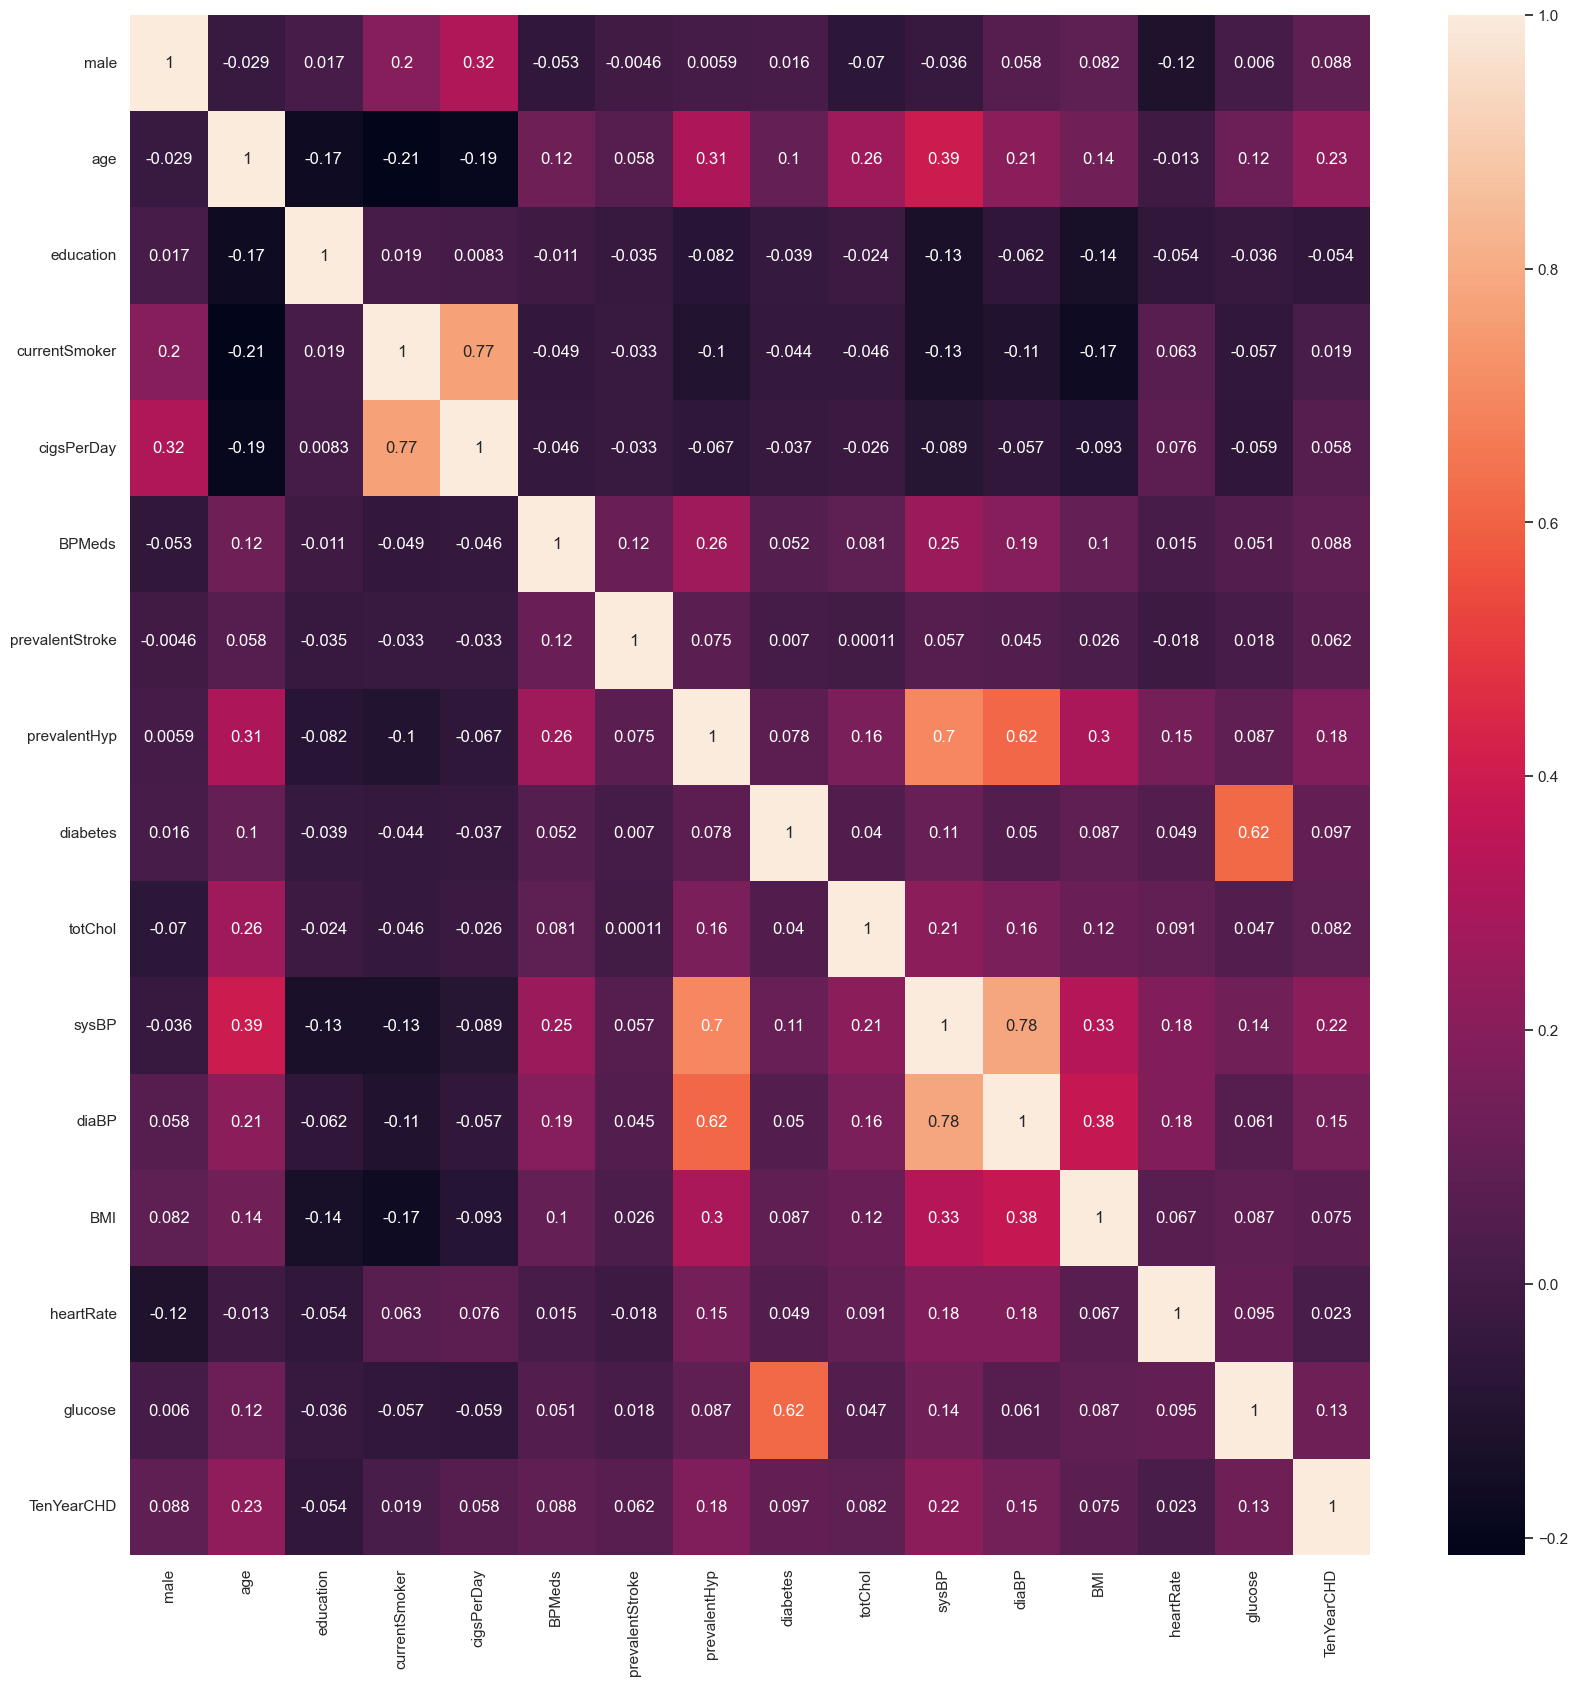

In [15]:
plt.figure(figsize=(20,20))
sns.heatmap(heart_data.corr(),annot=True);

In [16]:
# splitting data into training and testing data
# x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)


In [23]:
# Drop rows with any missing values
# x_train_clean = x_train.dropna()
# y_train_clean = y_train[x_train.index] 

In [27]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline


C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:15: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [29]:
# splitting data into training and testing data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=42)


In [30]:
# Creating a pipeline with an imputer and HistGradientBoostingClassifier
pipeline = make_pipeline(SimpleImputer(strategy='mean'), HistGradientBoostingClassifier())

In [32]:
# Fitting the model
#pipeline.fit(x_train, y_train)

# Predictions on validation set
#predictions = pipeline.predict(x_val)
pipeline = make_pipeline(SimpleImputer(strategy='mean'), LogisticRegression(max_iter=1000))

# Fitting the model
pipeline.fit(x_train, y_train)

# Predictions on validation set
predictions = pipeline.predict(x_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Validation Accuracy: {accuracy}")

Validation Accuracy: 0.8466981132075472


C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [36]:
print(x.shape,x_train.shape,x_test.shape)

(4240, 15) (3392, 15) (848, 15)


In [37]:
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(y_test,predictions)
print(confusion_matrix)

[[711   8]
 [122   7]]
